In [36]:
## MODELING RANDOM FOREST 
#### Advance Project - 9: Classification using Random Forest on Company_Data.csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data=pd.read_csv("C:\\Users\\User\\Desktop\\Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [15]:
data.shape

(400, 11)

In [17]:
data.columns = data.columns.str.strip().str.lower()
print(data.columns)

Index(['sales', 'compprice', 'income', 'advertising', 'population', 'price',
       'shelveloc', 'age', 'education', 'urban', 'us'],
      dtype='object')


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sales'] = le.fit_transform(data['sales']) 
print("sales column encoded.")

sales column encoded.


In [30]:
X = data.iloc[:, 1:4]  
y = data.iloc[:, -1] 

In [32]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Data split into training and testing sets.")


Data split into training and testing sets.


In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Feature scaling applied.\n")


Feature scaling applied.



In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
# Build the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Predictions
y_pred = rf_model.predict(X_test)

In [46]:
# Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {round(acc * 100, 2)}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 90.0%

Classification Report:
               precision    recall  f1-score   support

          No       0.79      0.96      0.87        28
         Yes       0.98      0.87      0.92        52

    accuracy                           0.90        80
   macro avg       0.89      0.91      0.89        80
weighted avg       0.91      0.90      0.90        80


Confusion Matrix:
 [[27  1]
 [ 7 45]]


C:\Users\User\AppData\Local\Temp\ipykernel_12220\3768438880.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')


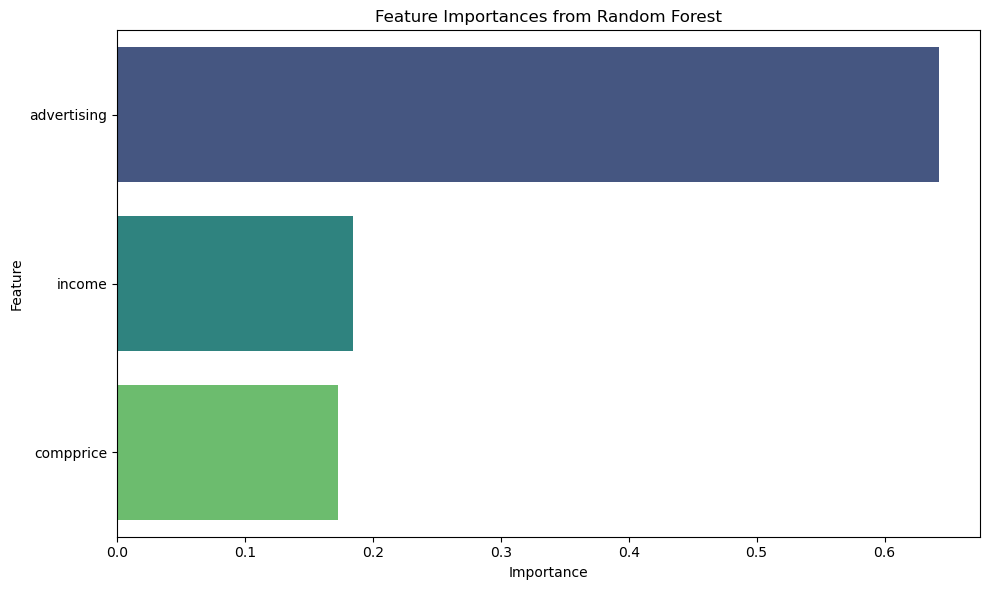

In [50]:
## Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Create DataFrame
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='viridis')
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.savefig("eda_graphs/feature_importance.png")
plt.show()